Original square pattern:
[[1 1 1 1]
 [1 0 0 1]
 [1 0 0 1]
 [1 1 1 1]]

Singular values:
[3.23606798e+00 1.23606798e+00 7.87203124e-17 3.56563505e-17]


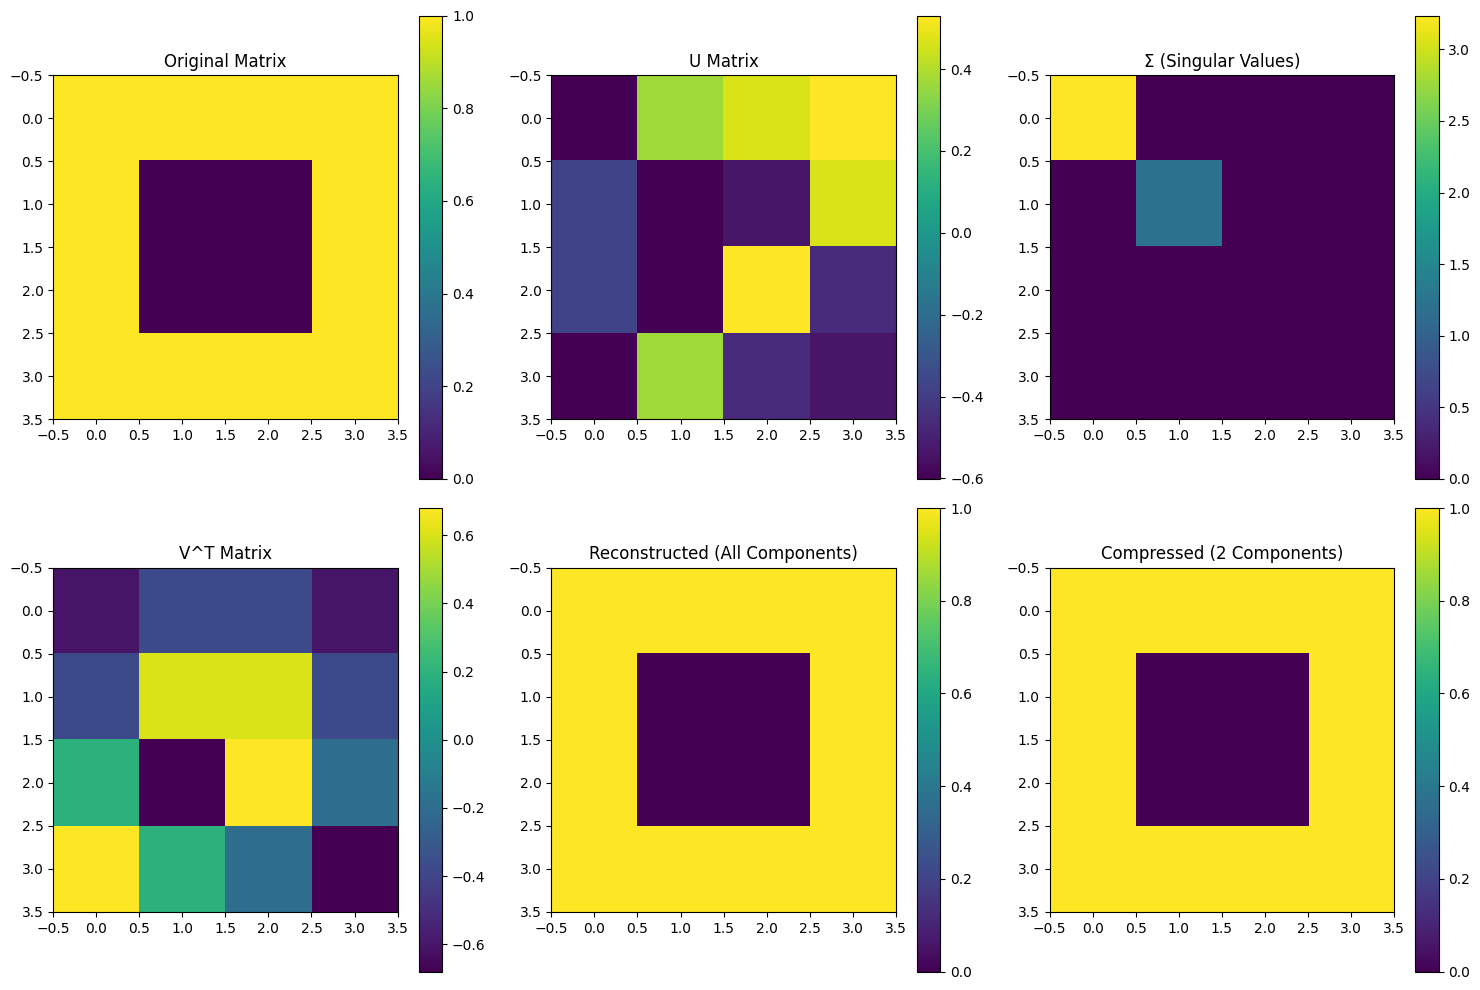


Step-by-step reconstruction:

1. Original singular values:
[3.23606798e+00 1.23606798e+00 7.87203124e-17 3.56563505e-17]

2. Reconstruction using only first component:
[[1.17 0.72 0.72 1.17]
 [0.72 0.45 0.45 0.72]
 [0.72 0.45 0.45 0.72]
 [1.17 0.72 0.72 1.17]]

3. Reconstruction using first two components:
[[ 1.  1.  1.  1.]
 [ 1. -0.  0.  1.]
 [ 1. -0.  0.  1.]
 [ 1.  1.  1.  1.]]

Contribution of each singular value:
Singular value 1: 87.3%
Singular value 2: 12.7%
Singular value 3: 0.0%
Singular value 4: 0.0%


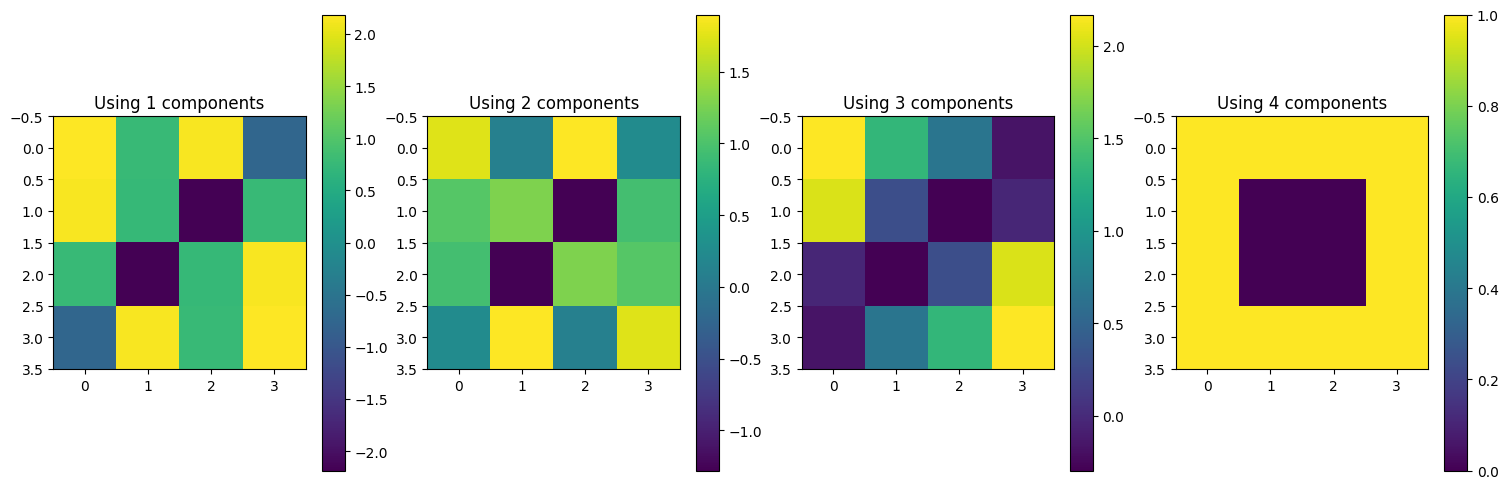

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple "square" pattern matrix
square = np.array([
    [1, 1, 1, 1],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [1, 1, 1, 1]
])

# Perform SVD
U, s, Vh = np.linalg.svd(square)

print("Original square pattern:")
print(square)
print("\nSingular values:")
print(s)

# Let's visualize everything step by step
plt.figure(figsize=(15, 10))

# 1. Show original
plt.subplot(231)
plt.imshow(square, cmap='viridis')
plt.title('Original Matrix')
plt.colorbar()

# 2. Show U matrix
plt.subplot(232)
plt.imshow(U, cmap='viridis')
plt.title('U Matrix')
plt.colorbar()

# 3. Show singular values as diagonal matrix
S = np.zeros_like(square, dtype=float)
np.fill_diagonal(S, s)
plt.subplot(233)
plt.imshow(S, cmap='viridis')
plt.title('Σ (Singular Values)')
plt.colorbar()

# 4. Show V transpose
plt.subplot(234)
plt.imshow(Vh, cmap='viridis')
plt.title('V^T Matrix')
plt.colorbar()

# 5. Show reconstruction
reconstruction = U @ S @ Vh
plt.subplot(235)
plt.imshow(reconstruction, cmap='viridis')
plt.title('Reconstructed (All Components)')
plt.colorbar()

# 6. Show compressed version (using only top 2 singular values)
S_compressed = np.zeros_like(square, dtype=float)
np.fill_diagonal(S_compressed, [s[0], s[1], 0, 0])  # Keep only top 2 values
compressed = U @ S_compressed @ Vh
plt.subplot(236)
plt.imshow(compressed, cmap='viridis')
plt.title('Compressed (2 Components)')
plt.colorbar()

plt.tight_layout()
plt.show()

# Let's also see how reconstruction works step by step
print("\nStep-by-step reconstruction:")
print("\n1. Original singular values:")
print(s)

print("\n2. Reconstruction using only first component:")
S1 = np.zeros_like(square, dtype=float)
S1[0, 0] = s[0]
reconstruction1 = U @ S1 @ Vh
print(reconstruction1.round(2))

print("\n3. Reconstruction using first two components:")
S2 = np.zeros_like(square, dtype=float)
S2[0, 0] = s[0]
S2[1, 1] = s[1]
reconstruction2 = U @ S2 @ Vh
print(reconstruction2.round(2))

# Show how much each singular value contributes to the total
total_energy = np.sum(s**2)
print("\nContribution of each singular value:")
for i, singular_value in enumerate(s):
    contribution = (singular_value**2) / total_energy * 100
    print(f"Singular value {i+1}: {contribution:.1f}%")

# Let's visualize the reconstruction process step by step
plt.figure(figsize=(15, 5))

for i in range(len(s)):
    # Create S matrix with i+1 singular values
    S_partial = np.zeros_like(square, dtype=float)
    np.fill_diagonal(S_partial, s[:i+1])
    reconstruction_partial = U @ S_partial @ Vh
    
    plt.subplot(1, 4, i+1)
    plt.imshow(reconstruction_partial, cmap='viridis')
    plt.title(f'Using {i+1} components')
    plt.colorbar()

plt.tight_layout()
plt.show()

# Understanding Matrix and Tensor Decompositions: An Intuitive Guide

## 1. Singular Value Decomposition (SVD)

Think of SVD as breaking down a transformation into three simpler steps:
1. Rotate/flip (V^T)
2. Stretch/shrink (Σ)
3. Rotate/flip again (U)

When we write $$A = U\Sigma V^T$$, we're saying:

```
[Original Matrix] = [Rotation 1] × [Stretching] × [Rotation 2]
```



In [8]:
import numpy as np

# Let's take an original matrix A
A = np.array([[1, 2], 
              [3, 4]])

# When we do SVD
U, s, Vh = np.linalg.svd(A)

print("Original matrix A:")
print(A)
print("\nIts components after decomposition:")
print("U:")
print(U)
print("\nSingular values (Σ):")
print(s)
print("\nV^T:")
print(Vh)

# We can reconstruct A by multiplying these components
Sigma = np.diag(s)  # Turn singular values into diagonal matrix
A_reconstructed = U @ Sigma @ Vh
print("\nReconstructed A:")
print(A_reconstructed)

Original matrix A:
[[1 2]
 [3 4]]

Its components after decomposition:
U:
[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]

Singular values (Σ):
[5.4649857  0.36596619]

V^T:
[[-0.57604844 -0.81741556]
 [ 0.81741556 -0.57604844]]

Reconstructed A:
[[1. 2.]
 [3. 4.]]


In [9]:
# Original high-dimensional data matrix
A = np.random.rand(100, 100)

# Decompose it
U, s, Vh = np.linalg.svd(A)

# Now we can see:
# - Principal components (in V^T)
# - Their importance (in s)
# - How they map to output (in U)

# We can also compress by keeping only top k components
k = 10
A_compressed = U[:,:k] @ np.diag(s[:k]) @ Vh[:k,:]

### Visual Example:
Let's see how SVD transforms a simple square:

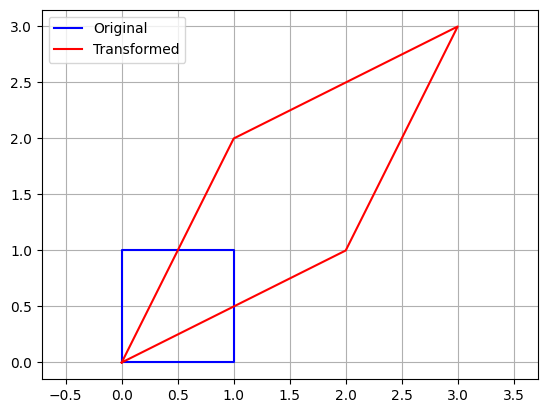

In [4]:
import numpy as np
from matplotlib import pyplot as plt

# Create points for a square
square = np.array([[0,0], [1,0], [1,1], [0,1], [0,0]])

# Transform it with matrix A
A = np.array([[2, 1], [1, 2]])
transformed = square @ A

# Plot original and transformed
plt.plot(square[:,0], square[:,1], 'b-', label='Original')
plt.plot(transformed[:,0], transformed[:,1], 'r-', label='Transformed')
plt.legend()
plt.axis('equal')
plt.grid(True)


### Real-world analogy:
Think of it like taking a photo (matrix) and breaking it down into:
- Basic patterns (U)
- How important each pattern is (Σ)
- How to combine them (V^T)

This is why SVD is great for compression - you can keep the most important patterns (largest values in Σ) and throw away the rest!

## 2. Eigendecomposition

For a square matrix A: $$A = Q\Lambda Q^{-1}$$

Think of eigendecomposition as finding the "natural directions" (eigenvectors) and "stretching factors" (eigenvalues) of a transformation.

### Visual Example:
Imagine pushing on a spring:
- The direction it naturally moves (compresses/extends) is an eigenvector
- How much it moves is the eigenvalue
- All other movements can be described in terms of these natural directions

### Real-world example:
In physics, eigendecomposition helps find:
- Natural vibration modes of a bridge
- Stable orbits of planets
- Quantum states of particles

## 3. LU Decomposition

$$A = LU$$
where L is lower triangular and U is upper triangular.

Think of it like solving a puzzle in steps:
- L (Lower): What steps do you take?
- U (Upper): In what order?

### Visual Example:
```
Original Matrix:    L (Lower):        U (Upper):
[4  3]           [1  0]           [4  3]
[6  3]     =     [1.5  1]    ×    [0  -1.5]
```

### Real-world analogy:
Like organizing a task list:
- L: Dependencies (what must be done before what)
- U: Actual tasks to complete

## 4. Tensor Decompositions

### CP (CANDECOMP/PARAFAC) Decomposition

Think of CP as finding the "building blocks" of a 3D (or higher) array.

Visual representation of a 3D tensor decomposition:
```
3D Tensor ≈ sum of (vector₁ ⊗ vector₂ ⊗ vector₃)
```

### Real-world example:
Imagine a dataset of:
- Customers
- Products
- Time

CP decomposition might reveal:
- Customer groups
- Product categories
- Seasonal patterns

### Tucker Decomposition

Like SVD but for higher dimensions. Instead of just rows and columns, you can have any number of dimensions.

Visual representation:
```
3D Tensor ≈ Core tensor × Matrix₁ × Matrix₂ × Matrix₃
```

## 5. When to Use Each

### Use SVD when:
- Doing dimensionality reduction
- Compressing data
- Finding patterns in 2D data
- Working with images
- Need optimal low-rank approximation

### Use Eigendecomposition when:
- Working with square matrices
- Studying dynamical systems
- Need to find principal directions
- Doing PCA
- Analyzing vibrations/oscillations

### Use LU Decomposition when:
- Solving linear equations
- Need fast numerical solutions
- Working with triangular systems
- Doing Gaussian elimination

### Use Tensor Decompositions when:
- Have multi-dimensional data
- Analyzing temporal patterns
- Working with multi-modal data
- Need to find hidden patterns in complex data

## 6. Simple Implementations

### SVD Example:

In [7]:
def simple_svd_compression(image, k):
    """Compress image keeping top k components."""
    U, s, Vh = np.linalg.svd(image)
    # Reconstruct using only top k singular values
    compressed = U[:,:k] @ np.diag(s[:k]) @ Vh[:k,:]
    return compressed

# Usage:
img = plt.imread('./download.jpeg')
compressed = simple_svd_compression(img, k=50)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 158)

### Eigendecomposition Example:

In [ ]:
def find_principal_directions(data):
    """Find main directions in your data."""
    # Calculate covariance matrix
    cov = data.T @ data
    # Get eigenvalues and eigenvectors
    eigenvals, eigenvecs = np.linalg.eig(cov)
    # Sort by importance
    idx = eigenvals.argsort()[::-1]
    return eigenvals[idx], eigenvecs[:,idx]

## 7. Visual Examples of Applications

### Image Compression (SVD):

In [ ]:
import numpy as np
from PIL import Image

# Load image
img = Image.open('image.jpg').convert('L')  # Convert to grayscale
A = np.array(img)

# SVD
U, s, Vh = np.linalg.svd(A)

# Reconstruct with different numbers of components
k_values = [5, 20, 50]
for k in k_values:
    compressed = U[:,:k] @ np.diag(s[:k]) @ Vh[:k,:]
    Image.fromarray(compressed.astype('uint8')).save(f'compressed_{k}.jpg')


## 8. Common Pitfalls and Solutions

1. **Numerical Stability**
   - Problem: Large condition numbers
   - Solution: Use scaled/normalized data

2. **Computational Cost**
   - Problem: Large matrices
   - Solution: Use randomized methods

3. **Memory Issues**
   - Problem: Can't fit in memory
   - Solution: Use incremental/streaming methods

4. **Complex Numbers**
   - Problem: Eigenvalues can be complex
   - Solution: Use real Schur decomposition

Remember:
- Matrix decompositions are like LEGO bricks - they break down complicated things into simpler pieces
- Different decompositions highlight different aspects of your data
- Choose the right decomposition based on your needs:
  - Need compression? → SVD
  - Need to understand dynamics? → Eigendecomposition
  - Need to solve equations? → LU
  - Have multi-dimensional data? → Tensor decompositions

Would you like me to elaborate on any of these concepts or show more detailed examples?

In [2]:
import numpy as np
from scipy import linalg

# Matrix and Tensor Decomposition: From Basics to Advanced

## 1. Matrix Decomposition Fundamentals


### 1.1 Singular Value Decomposition (SVD)
The fundamental matrix decomposition: $$A = U\Sigma V^T$$

In [3]:
# Create a sample matrix
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Perform SVD
U, s, Vh = np.linalg.svd(A)

# Reconstruct matrix
Sigma = np.zeros_like(A, dtype=float)
np.fill_diagonal(Sigma, s)
A_reconstructed = U @ Sigma @ Vh

print(f"Original matrix:\n{A}")
print(f"\nReconstructed matrix:\n{A_reconstructed}")

Original matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Reconstructed matrix:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


### 1.2 Eigendecomposition
For square matrices: $$A = Q\Lambda Q^{-1}$$

In [ ]:
# Only for square matrices
eigenvalues, eigenvectors = np.linalg.eig(A)

# Reconstruction
Lambda = np.diag(eigenvalues)
A_reconstructed = eigenvectors @ Lambda @ np.linalg.inv(eigenvectors)

### 1.3 LU Decomposition
For square matrices: $$A = LU$$

In [ ]:
# LU decomposition
P, L, U = linalg.lu(A)

# Reconstruction
A_reconstructed = P @ L @ U



## 2. Applications and Practice Problems

### Problem 1: Image Compression using SVD
Implement image compression by keeping only the top k singular values.

```python
def compress_image(image_matrix, k):
    """
    Compress image using SVD by keeping top k singular values.
    
    Args:
        image_matrix: 2D numpy array (grayscale image)
        k: number of singular values to keep
    
    Returns:
        compressed_image: 2D numpy array
    """
    # Your code here
    pass

# Test case
from skimage import data
camera = data.camera()
compressed = compress_image(camera, k=50)
```

### Problem 2: Principal Component Analysis (PCA)
Implement PCA from scratch using SVD.

```python
def implement_pca(X, n_components):
    """
    Implement PCA using SVD.
    
    Args:
        X: Data matrix (n_samples, n_features)
        n_components: Number of components to keep
        
    Returns:
        X_transformed: Transformed data
        components: Principal components
    """
    # Your code here
    pass

# Test case
from sklearn.datasets import load_iris
iris = load_iris()
X_transformed, components = implement_pca(iris.data, n_components=2)
```

## 3. Tensor Decomposition

### 3.1 CP (CANDECOMP/PARAFAC) Decomposition
Decomposing a tensor into a sum of outer products:

```python
import tensorly as tl
from tensorly.decomposition import parafac

# Create a sample 3D tensor
tensor = np.random.random((10, 20, 30))

# CP decomposition
rank = 5
factors = parafac(tensor, rank=rank)

# Reconstruction
tensor_reconstructed = tl.cp_to_tensor(factors)
```

### 3.2 Tucker Decomposition
Decomposing a tensor into a core tensor and factor matrices:

```python
from tensorly.decomposition import tucker

# Tucker decomposition
core, factors = tucker(tensor, ranks=[5, 5, 5])

# Reconstruction
tensor_reconstructed = tl.tucker_to_tensor((core, factors))
```

## 4. Advanced Problems

### Problem 3: Collaborative Filtering
Implement a recommendation system using matrix factorization.

```python
def matrix_factorization(R, K, steps=1000, alpha=0.0002, beta=0.02):
    """
    Matrix factorization using gradient descent.
    
    Args:
        R: Rating matrix
        K: Number of latent features
        steps: Number of iterations
        alpha: Learning rate
        beta: Regularization parameter
    
    Returns:
        P, Q: Factorized matrices
    """
    # Your code here
    pass

# Test case
ratings = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 1, 5, 4],
])
P, Q = matrix_factorization(ratings, K=2)
```

### Problem 4: Tensor Face Recognition
Implement a face recognition system using tensor decomposition.

```python
def tensor_faces(faces_tensor, n_components=50):
    """
    Implement tensorface recognition.
    
    Args:
        faces_tensor: 4D tensor (people, views, height, width)
        n_components: Number of components to keep
    
    Returns:
        features: Extracted features for each person
    """
    # Your code here
    pass
```

## 5. Solutions

<details>
<summary>Click to see solutions</summary>

### Solution 1: Image Compression
```python
def compress_image(image_matrix, k):
    U, s, Vh = np.linalg.svd(image_matrix)
    
    # Keep only top k singular values
    U_k = U[:, :k]
    s_k = s[:k]
    Vh_k = Vh[:k, :]
    
    # Reconstruct
    compressed = U_k @ np.diag(s_k) @ Vh_k
    
    # Ensure values are in valid range
    return np.clip(compressed, 0, 255).astype(np.uint8)
```

### Solution 2: PCA
```python
def implement_pca(X, n_components):
    # Center the data
    X_centered = X - X.mean(axis=0)
    
    # Perform SVD
    U, s, Vh = np.linalg.svd(X_centered)
    
    # Get components and transformed data
    components = Vh[:n_components]
    X_transformed = X_centered @ components.T
    
    return X_transformed, components
```

### Solution 3: Collaborative Filtering
```python
def matrix_factorization(R, K, steps=1000, alpha=0.0002, beta=0.02):
    N, M = R.shape
    P = np.random.rand(N, K)
    Q = np.random.rand(M, K)
    
    for step in range(steps):
        for i in range(N):
            for j in range(M):
                if R[i][j] > 0:
                    # Calculate error
                    eij = R[i][j] - np.dot(P[i,:], Q[j,:].T)
                    
                    # Update P and Q
                    for k in range(K):
                        P[i][k] += alpha * (2 * eij * Q[j][k] - beta * P[i][k])
                        Q[j][k] += alpha * (2 * eij * P[i][k] - beta * Q[j][k])
        
        # Calculate error
        error = 0
        for i in range(N):
            for j in range(M):
                if R[i][j] > 0:
                    error += pow(R[i][j] - np.dot(P[i,:], Q[j,:].T), 2)
        if error < 0.001:
            break
            
    return P, Q
```
</details>


## 6. Mathematical Deep Dive

### 6.1 SVD Properties
1. **Orthogonality**: $$U^TU = I, V^TV = I$$
2. **Singular Values**: Non-negative, sorted in descending order
3. **Low-rank Approximation**: Optimal in Frobenius norm

### 6.2 Tensor Operations
1. **Mode-n Product**: $$\mathcal{Y} = \mathcal{X} \times_n A$$
2. **Kronecker Product**: $$A \otimes B$$
3. **Khatri-Rao Product**: $$A \odot B$$

## 7. Practical Applications

1. **Dimensionality Reduction**
   - Feature extraction in ML
   - Data compression
   - Noise reduction

2. **Recommendation Systems**
   - Netflix movie recommendations
   - Product recommendations
   - Friend suggestions

3. **Signal Processing**
   - Image/video compression
   - Source separation
   - Signal denoising

4. **Natural Language Processing**
   - Topic modeling
   - Word embeddings
   - Document clustering

## 8. Best Practices

1. **Preprocessing**
   - Scale/normalize data
   - Handle missing values
   - Remove outliers

2. **Computational Efficiency**
   - Use randomized algorithms for large matrices
   - Implement truncated SVD when possible
   - Consider sparse implementations

3. **Model Selection**
   - Choose appropriate rank
   - Cross-validate results
   - Monitor reconstruction error

## Further Exercises

1. Implement randomized SVD for large matrices
2. Create a face recognition system using eigenfaces
3. Build a document clustering system using NMF
4. Implement tensor completion for missing data
5. Create a music recommendation system using matrix factorization

## Additional Resources

1. **Books**
   - "Matrix Computations" by Golub and Van Loan
   - "Numerical Linear Algebra" by Trefethen and Bau

2. **Papers**
   - "A Survey of Matrix Factorization Techniques" by Singh & Gordon
   - "Tensor Decompositions and Applications" by Kolda & Bader

3. **Libraries**
   - NumPy
   - TensorLy
   - Scikit-learn
   - PyTorch

Happy decomposing! 🧮✨